In [37]:
import pandas as pd
import numpy as np
import scipy.stats
import math
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns


In [38]:
#####labor
shares=pd.read_csv('/Users/hannahkamen/Downloads/le0_shr2.csv')

shares_u=shares.drop_duplicates(subset=['q','h','sk']).pivot(index=['q','h'],columns='sk',values='skill_shr').reset_index()
shares_u['diff']=shares_u['skl']-shares_u['unskl']

shocks=pd.read_csv('/Users/hannahkamen/Downloads/le0_shock0_v2_test2_adj.csv')
shocks=shocks.rename(columns={'skill_shr':'pct_shock'})

shocks_lm=shocks[(shocks['r']==shocks['q'])]

#####labor wage pivot get relative shortages

labor_wage=shocks_lm.drop_duplicates(subset=['r','sk']).merge(pl_rpt0,left_on=['r','sk'],right_on=['region','skill'],how='inner')
labor_wage['wage_diff']=labor_wage['pl_shock0']-1
limit_states=['HI','WY','VT','AK','TN','DC','NH','WV']
labor_wage=labor_wage[~(labor_wage['region'].isin(limit_states))]
labor_wage_skl=labor_wage[(labor_wage['skill']=='skl') ]
labor_wage_unskl=labor_wage[(labor_wage['skill']=='unskl') & (~labor_wage['pct_shock'].isin(limit_states))]


# shocks_lm=shocks_lm.sort_values(by=['sk','pct_shock'],ascending=True).drop_duplicates(subset=['r','sk'])
labor_wage_pvt=labor_wage.pivot_table(index='r',columns='sk',values=['pct_shock','wage_diff'])
labor_wage_pvt.columns = ["_".join((j,k)) for j,k in labor_wage_pvt.columns]
labor_wage_pvt=labor_wage_pvt.reset_index()
labor_wage_pvt['difference']=labor_wage_pvt['pct_shock_skl']-labor_wage_pvt['pct_shock_unskl']


In [102]:
##### import GAMS results
#########Benchmark characteristics
##############################################################################
##############################################################################

t='_d2_v2'

hhtrn0_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/exp/csv%s/hhtrn0_d_rpt.csv'%t)
del hhtrn0_d_rpt['file']
hhtrn0_d_rpt=hhtrn0_d_rpt.groupby(['r','h','sk'],as_index=False).sum()

#initial labor endowment
le0_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/exp/csv%s/le0_d_rpt.csv'%t)
del le0_d_rpt['file']

#new labor endowment
le0_d_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/exp/csv%s/le0_d_rpt0.csv'%t)
del le0_d_rpt0['file']

#cons0_rpt(r,h,sk)=c0_h_d(r,h,sk);
cons0_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/exp/csv%s/cons0_rpt.csv'%t)
del cons0_rpt['file']

####cons demand benchmark
cd0_h_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/exp/csv%s/cd0_h_d_rpt.csv'%t)
del cd0_h_d_rpt['file']

####sector labor demand by skill
ld0_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/exp/csv%s/ld0_d_rpt.csv'%t)
# del ld0_d_rpt['file']

###intermediate goods demand

id0_rpt= pd.read_csv('/Users/hannahkamen/Downloads/clim/exp/csv%s/id0_rpt.csv'%t)
del id0_rpt['file']

#########Full Result characteristics
##############################################################################
##############################################################################

###set file for imports
t='_d2_v2'

##wages
pl_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/exp/csv%s/pl_rpt0.csv'%t)


###consumer price index
pc_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/exp/csv%s/pc_rpt0.csv'%t)


####output changes by sector 
y_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/exp/csv%s/y_rpt0.csv'%t)


ys0_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/exp/csv%s/ys0_rpt.csv'%t)


####output changes by sector 
py_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/exp/csv%s/py_rpt0.csv'%t)




In [103]:
list(le0_gr0)

['region', 'rank_skl1', 'rank_unskl1']

In [104]:
le0_gr=le0_d_rpt.groupby(['region','skill'],as_index=False).sum()
le0_tot=le0_d_rpt.groupby(['region'],as_index=False).sum()
le0_tot=le0_tot.rename(columns={'benchmark_le0':'benchmark_le0_tot'})
le0_gr=le0_gr.merge(le0_tot,on='region')
le0_gr['pct']=le0_gr['benchmark_le0']/le0_gr['benchmark_le0_tot']
le0_gr=le0_gr.pivot_table(index='region',columns='skill',values='pct').reset_index()

# ####assign index
le0_gr['rank_skl0'] = le0_gr['skl'].rank(method='first', ascending=False)
le0_gr['rank_unskl0'] = le0_gr['unskl'].rank(method='first', ascending=False)

le0_gr=le0_gr[['region','rank_skl0','rank_unskl0']]
##################################################################################
le0_gr0=le0_d_rpt0.groupby(['region','skill'],as_index=False).sum()
le0_tot0=le0_d_rpt0.groupby(['region'],as_index=False).sum()
le0_tot0=le0_tot0.rename(columns={'le0_shock0':'le0_shock0_tot'})
le0_gr0=le0_gr0.merge(le0_tot0,on='region')
le0_gr0['pct']=le0_gr0['le0_shock0']/le0_gr0['le0_shock0_tot']
le0_gr0=le0_gr0.pivot_table(index='region',columns='skill',values='pct').reset_index()


# ####assign index
le0_gr0['rank_skl1'] = le0_gr0['skl'].rank(method='first', ascending=False)
le0_gr0['rank_unskl1'] = le0_gr0['unskl'].rank(method='first', ascending=False)

le0_gr0=le0_gr0[['region','rank_skl1','rank_unskl1']]
rank=le0_gr.merge(le0_gr0,on='region')



In [105]:
########run without producer substitution

In [106]:
# ####plot labor endowment changes
# fig, ax = plt.subplots(1, 1,figsize=(15,6))
# shocks_lm=shocks_lm.sort_values(by=['sk','pct_shock'],ascending=True).reset_index()
# sns.set_theme(style="whitegrid")
# g = sns.barplot(
#     data=shocks_lm,
#     x="r", y='pct_shock',hue='sk',
#    palette=['#111111','#777777'])
# plt.legend(loc='upper left')
# plt.ylabel("Pct Change")


##### Get Trade Substitution Results

In [107]:
# pl_rpt0['file'].unique()

In [108]:
trade_exp=['staticmodel_d2_v2_it0_1.6_1_1.0',
           'staticmodel_d2_v2_it0_1.6_1_1.1',
           'staticmodel_d2_v2_it0_1.6_1_1.2',
           'staticmodel_d2_v2_it0_1.6_1_1.3',
           'staticmodel_d2_v2_it0_1.6_1_1.4',
           'staticmodel_d2_v2_it0_1.6_1_1.8',
           'staticmodel_d2_v2_it0_1.6_1_1.9',
           'staticmodel_d2_v2_it0_1.6_1_2.0',
           'staticmodel_d2_v2_it0_1.6_1_2.1',
           'staticmodel_d2_v2_it0_1.6_1_2.2',
           'staticmodel_d2_v2_it0_1.6_1_2.3',
           'staticmodel_d2_v2_it0_1.6_1_2.4',
           'staticmodel_d2_v2_it0_1.6_1_2.5',
           'staticmodel_d2_v2_it0_1.6_1_2.6',
           'staticmodel_d2_v2_it0_1.6_1_2.7',
           'staticmodel_d2_v2_it0_1.6_1_2.8',
           'staticmodel_d2_v2_it0_1.6_1_2.9',
           'staticmodel_d2_v2_it0_1.6_1_3.0']

In [109]:
pl_rpt0=pl_rpt0[pl_rpt0['file'].isin(trade_exp)]
pl_rpt0['esubl']=round(pl_rpt0['file'].apply(lambda x:x.split("_")[6]).astype(float),1)
pl_rpt0['esubl']=np.where(pl_rpt0['esubl']==2,.9,pl_rpt0['esubl'])
pl_rpt0=pl_rpt0[~pl_rpt0['region'].isin(['AK','DC','HI','NH','VT','WY','WV'])]



In [110]:
pl_rpt0['pl_diff']=pl_rpt0['pl_shock0']-1

In [117]:
labor_wage_pvt.head()

,r,pct_shock_skl,pct_shock_unskl,wage_diff_skl,wage_diff_unskl,difference
0,AL,-0.105078,-0.033356,0.014370,-0.007523,-0.071722
1,AR,0.021595,0.029810,0.000169,-0.002077,-0.008215
2,AZ,0.011136,0.082000,0.003306,-0.010760,-0.070865
3,CA,0.020290,0.064169,-0.001167,-0.015234,-0.043880
4,CO,-0.100995,-0.165662,0.000087,0.030997,0.064667


In [125]:
pl_pvt=pl_rpt0.pivot_table(index='region',columns='skill',values='pl_shock0').reset_index()

In [151]:
py_pvt=py_rpt0[py_rpt0['good'].isin(['res','hos','hou','amb'])].pivot_table(index='region',columns='good',values='py0').reset_index()




In [152]:
pl_pvt[pl_pvt['region']=='TN']

skill,region,skl,unskl
38,TN,1.002096,1.000551


In [ ]:
# skill_abundance1=labor_wage_pvt[(labor_wage_pvt['difference']>0) & (labor_wage_pvt['pct_shock_skl']>0)]['r'].unique()
# not_skill_abundance1=labor_wage_pvt[(labor_wage_pvt['difference']<0 )& (labor_wage_pvt['pct_shock_unskl']>0)]['r'].unique()

skill_abundance3=labor_wage_pvt[(labor_wage_pvt['difference']>0) & (labor_wage_pvt['pct_shock_skl']>0)]['r'].unique()
not_skill_abundance3=labor_wage_pvt[(labor_wage_pvt['difference']<0 )& (labor_wage_pvt['pct_shock_unskl']>0)]['r'].unique()


skill_abundance2=py_pvt[ (py_pvt['hos']<py_pvt['res'])& (py_pvt['amb']<py_pvt['res'])]['region'].unique()
not_skill_abundance2=py_pvt[ (py_pvt['hos']>py_pvt['res'])& (py_pvt['amb']>py_pvt['res'])]['region'].unique()

# skill_abundance=pl_pvt[(pl_pvt['skl']<pl_pvt['unskl'])&(pl_pvt['skl']<1)]['region'].unique()
# not_skill_abundance=pl_pvt[(pl_pvt['unskl']<pl_pvt['skl'])&(pl_pvt['unskl']<1)]['region'].unique()


# skill_abundance1=pl_rpt0[(pl_rpt0['pl_diff']<0) & (pl_rpt0['skill']=='skl')]['region'].unique()
# not_skill_abundance1=pl_rpt0[(pl_rpt0['pl_diff']<0)& (pl_rpt0['skill']=='unskl')]['region'].unique()

skill_abundance1=rank[rank['rank_skl1']<rank['rank_skl0']]['region'].unique()
not_skill_abundance1=rank[rank['rank_unskl1']<rank['rank_unskl0']]['region'].unique()

skill_abundance=list(set(skill_abundance1) & set(skill_abundance2) & set(skill_abundance3))
not_skill_abundance=list(set(not_skill_abundance1) & set(not_skill_abundance2) & set(not_skill_abundance3))


In [164]:
####read in exports

exports=pd.read_excel('/Users/hannahkamen/Downloads/benchmark_exports.xlsx')

In [172]:
py_pvt['skl_to_unskl_pratio']=py_pvt['amb']/py_pvt['res']
py_pvt=py_pvt.sort_values(by='skl_to_unskl_pratio')

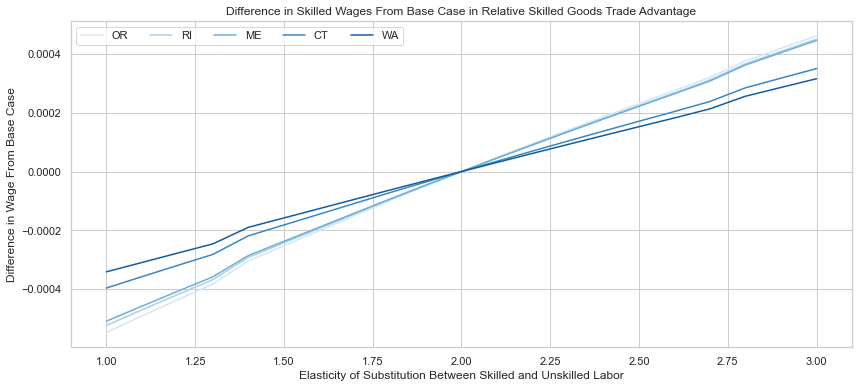

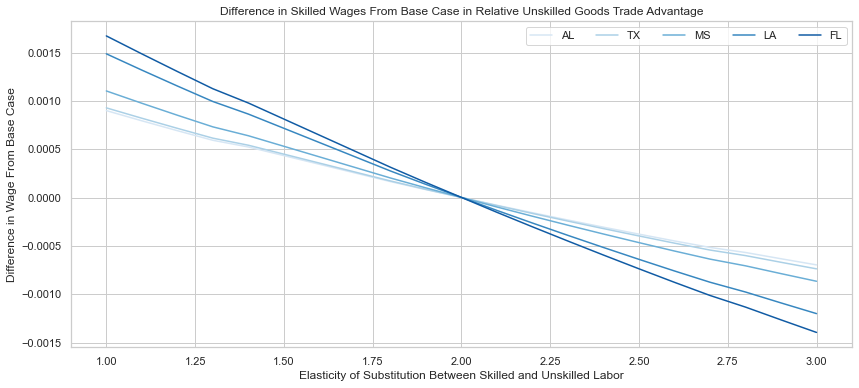

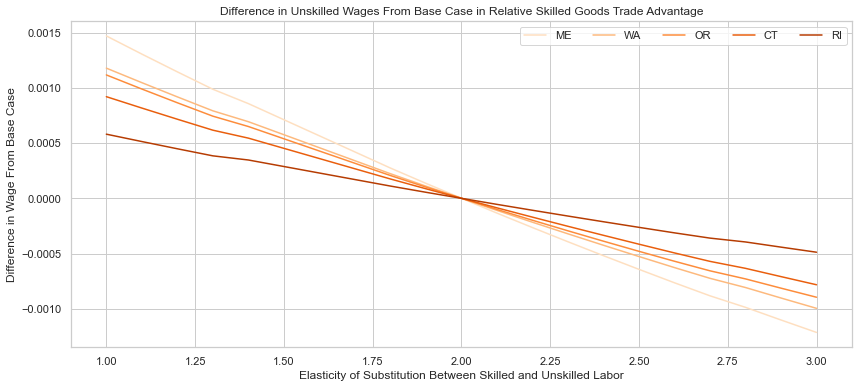

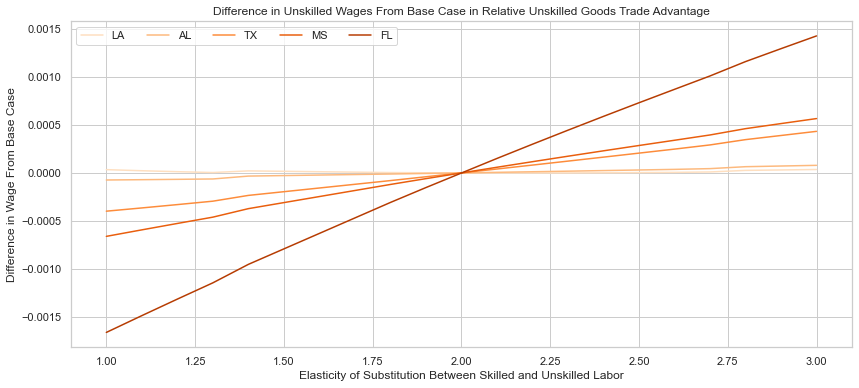

In [183]:
skill_abundance=['WA','OR','ME','CT','RI']
not_skill_abundance=['FL','LA','TX','MS','AL']


for sk, slab, c,sort in zip(['skl','unskl'],['Skilled','Unskilled'],['Blues','Oranges'],[True, False]):
    for lst, lab in zip([skill_abundance,not_skill_abundance],['Skilled','Unskilled']):
        pl_rpt0_sk=pl_rpt0[pl_rpt0['skill']==sk]

        ####take difference from first price
        pl_rpt0_sk=pl_rpt0_sk.sort_values(['region','esubl'])
        first_dates = pl_rpt0_sk.groupby('region')['pl_diff'].first()
        pl_rpt0_sk=pl_rpt0_sk.sort_values(by='region')
        pl_rpt0_sk['Difference in Wage From Base Case'] = (pl_rpt0_sk.set_index('region')['pl_diff'] - first_dates).values

        ####get first difference and assign graident color scheme accordingly

        first_diff=pd.DataFrame()
        for r in pl_rpt0_sk['region'].unique():
            tmp=pl_rpt0_sk[(pl_rpt0_sk['region']==r) & (pl_rpt0_sk['esubl']==1.1) ]
            tmp['first_diff']=tmp['Difference in Wage From Base Case']
            tmp=tmp[['region','first_diff']]
            first_diff=first_diff.append(tmp)

        pl_rpt0_sk=pl_rpt0_sk.merge(first_diff,on='region')

        pl_rpt0_lm=pl_rpt0_sk[(pl_rpt0_sk['region'].isin(lst))].sort_values(by='first_diff',ascending=sort).reset_index()
        pl_rpt0_lm=pl_rpt0_lm[pl_rpt0_lm['esubl']!=.9]
        sns.set_theme(style="whitegrid")
        fig, ax = plt.subplots(1, 1,figsize=(14,6))

        sns.set_palette("PuBuGn_d")
        g = sns.lineplot(
            data=pl_rpt0_lm,  x="esubl", y='Difference in Wage From Base Case',hue='region', palette=c
        )
        plt.legend(ncol=8)
        plt.xlabel('Elasticity of Substitution Between Skilled and Unskilled Labor')
        plt.title('Difference in %s Wages From Base Case in Relative %s Goods Trade Advantage'%(slab,lab))

